In [18]:
%matplotlib inline

import sys
import numpy as np
import cPickle
import matplotlib.pyplot as plt
import random
import pylab
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Preprocessing des données (moyenne nulle, variance 1)

In [2]:
def processing(time_series):
    return (time_series-np.mean(time_series))/np.std(time_series)

## Définition de la métrique d'erreur

In [8]:
def metric(t_s1, t_s2):
    return np.square( np.tile(t_s1,(t_s1.shape[0],1))-np.tile(t_s2,(t_s2.shape[0],1)).transpose())

## Définition du poids de Boltzmann

In [10]:
def Boltzmann(t_s1,t_s2,T=1.2):
    return np.exp(-metric(t_s1,t_s2)/T)

# Changement de coordonnées

# DP on a lattice Alberto 

In [25]:
random.seed(-2)
T=101

### Energy of the point to point DP at zero temperature

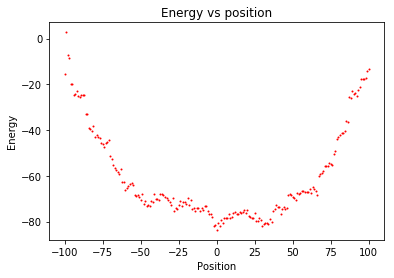

In [24]:
E = 100*np.ones(2*T-1)
E[0] = 0

for time in range(1,T) :
    for x in range(time,-time-2,-2) :
        E[x] = np.minimum(E[x-1],E[x+1]) + np.random.normal()

xt1 = np.arange(T)
xt2 = np.arange(T-1)-T+1
xt = np.concatenate((xt1,xt2))

plt.figure(3)
plt.plot(xt,E, 'r.', markersize=2)
plt.title('Energy vs position')
plt.xlabel('Position'), plt.ylabel('Energy')
plt.show(block=False)

### Position of the point to point DP at zero temperature 

In [ ]:
random.seed(-2)
T=105

## Free energy of the polymer
def zero_temperature_energy(T=101):
    E = 100*np.ones(2*T-1)
    E[0] = 0

    for time in range(1,T) :
        for x in range(time,-time-2,-2) :
            E[x] = np.minimum(E[x-1],E[x+1]) + np.random.normal()

    xt1 = np.arange(T)
    xt2 = np.arange(T-1)-T+1
    xt = np.concatenate((xt1,xt2))

# ou xt=np.roll(np.arange(-T+1,T),T)

    plt.figure(3)
    plt.plot(xt,E, 'r.', markersize=2)
    plt.title('Energy vs position')
    plt.xlabel('Position'), plt.ylabel('Energy')
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()

def zero_temperature_position(T=101) :
    # T should be odd
    lattice=np.zeros((T,2*T))
    E=10000*np.ones(2*T)

    ## Definition of the starting point
    E[0]=0

    for time in range(1,T) :
        for x in range(time,-time-2,-2) :
            values=[E[x-1],E[x+1]]
            lattice[time,x]=2*np.argmin(values)-1
            E[x]=np.amin(values)+np.random.normal()

    Polym=np.zeros(T)

    ## Definition of the ending point
    itoto=0
    Polym[T-1]=itoto

    for time in range(1,T-1):
        idelta=lattice[T-time,int(itoto)]
        itoto+=idelta
        Polym[T-1-time]=itoto

    plt.figure(5)
    plt.plot(Polym,range(T), 'r', markersize=2)
    plt.title('Path of the polymer')
    plt.xlabel('Position of the polymer'), plt.ylabel('Time')
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()

def temperature_partition(T=101) :
    beta=1
    Z=np.zeros(2*T-1)
    Z[0]=1
    for time in range(1,T) :
        for x in range(time,-time-2,-2) :
            Z[x]=(Z[x-1]+Z[x+1])*math.exp(-beta*np.random.normal())

def zero_temperature_position_3D(T=101) :
    # T should be odd
    lattice=np.zeros((T,2*T))
    E=10000*np.ones(2*T)

    disorder=np.random.normal(size=(T,2*T))

    fig = plt.figure(6,figsize=(12, 8))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-T, T)
    Y = np.arange(0, T)
    X, Y = np.meshgrid(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, disorder, cmap=cm.jet,linewidth=10, antialiased=False)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('x')
    ax.set_ylabel('time')
    ax.set_zlabel('Disorder strength')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()


    ## Definition of the starting point
    E[0]=0

    for time in range(1,T) :
        for x in range(np.minimum(time,T-time+1),np.maximum(-time,time-T-1)-2,-2) :
            values=[E[x-1],E[x+1]]
            lattice[time,x]=2*np.argmin(values)-1
            E[x]=np.amin(values)+disorder[time,x]

    Polym=np.zeros(T)

    ## Definition of the ending point
    # Polym is the "x" position on the lattice
    itoto=0
    Polym[T-1]=itoto

    for time in range(1,T-1):
        idelta=lattice[T-time,int(itoto)]
        itoto+=idelta
        Polym[T-1-time]=itoto

    plt.figure(5)
    plt.plot(Polym,range(T), 'r', markersize=2)
    plt.title('Path of the polymer')
    plt.xlabel('Position of the polymer'), plt.ylabel('Time')
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()


def zero_temperature_position_3D_2(T=101) :
    # T should be odd
    lattice=np.zeros((T,2*T))
    E=10000*np.ones(2*T)

    disorder=np.random.normal(size=(T,2*T))

    disorder2=np.roll(disorder, T, axis=1)

    fig = plt.figure(6,figsize=(12, 8))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-T, T)
    Y = np.arange(0, T)
    X, Y = np.meshgrid(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, disorder2, cmap=cm.jet,linewidth=1, antialiased=True)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('x')
    ax.set_ylabel('time')
    ax.set_zlabel('Disorder strength')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()

    #### Smoothing the surface

    xnew, ynew = np.mgrid[-T:T:0.5, -T:T:0.5]
    tck = interpolate.bisplrep(X, Y, disorder2, s=0)
    znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

    fig = plt.figure(7,figsize=(12,8))
    ax2 = fig.gca(projection='3d')
    surf2=ax2.plot_surface(xnew, ynew, znew, cmap=cm.jet, rstride=1, cstride=1, alpha=None, antialiased=True)
    ax2.zaxis.set_major_locator(LinearLocator(10))
    ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax2.set_xlabel('x')
    ax2.set_ylabel('time')
    ax2.set_zlabel('Disorder strength')

    fig.colorbar(surf2, shrink=0.5, aspect=5)
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()

    ## Definition of the starting point
    E[0]=0

    for time in range(1,T) :
        for x in range(np.minimum(time,T-time+2),np.maximum(-time,time-T-2)-2,-2) :
            values=[E[x-1],E[x+1]]
            lattice[time,x]=2*np.argmin(values)-1
            E[x]=np.amin(values)+disorder[time,x]

    Polym=np.zeros(T)

    ## Definition of the ending point
    # Polym is the "x" position on the lattice
    itoto=0
    Polym[T-1]=itoto

    for time in range(1,T-1):
        idelta=lattice[T-time,int(itoto)]
        itoto+=idelta
        Polym[T-1-time]=itoto

    plt.figure(8)
    plt.plot(Polym,range(T), 'r', markersize=2)
    plt.title('Path of the polymer')
    plt.xlabel('Position of the polymer'), plt.ylabel('Time')
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()


def zero_temperature_position_columnar(T=101) :
    # T should be odd
    lattice=np.zeros((T,2*T))
    E=10000*np.ones(2*T)

    disorder=np.random.normal(size=(T+1,1))+alpha*np.roll(np.arange(-T+1,T),T)
    ## Definition of the starting point
    E[0]=0

    for time in range(1,T) :
        for x in range(time,-time-2,-2) :
            values=[E[x-1],E[x+1]]
            lattice[time,x]=2*np.argmin(values)-1
            E[x]=np.amin(values)+np.random.normal()

    Polym=np.zeros(T)

    ## Definition of the ending point
    # Polym is the "x" position on the lattice
    itoto=0
    Polym[T-1]=itoto

    for time in range(1,T-1):
        idelta=lattice[T-time,int(itoto)]
        itoto+=idelta
        Polym[T-1-time]=itoto

    plt.figure(5)
    plt.plot(Polym,range(T), 'r', markersize=2)
    plt.title('Path of the polymer')
    plt.xlabel('Position of the polymer'), plt.ylabel('Time')
    plt.show(block=False)
    raw_input("<Hit Enter To Close>")
    plt.close()

#zero_temperature_position()
zero_temperature_position_3D_2(50)

# DP on a lattice Alberto 2

In [ ]:
T  =  120
E = [10000 for n in range(-T,T-1)]
E[0] = 0
for time in range(1,T) :
    for n in range(time+1) :
        x = time - 2*n
        E[x] = min(E[x-1],E[x+1]) + random.gauss(0,1)
xt1 = [n for n in range(0,T)]
xt2 = [n - T+1 for n in range(0,T-1)]
xt = xt1 + xt2        
pylab.plot(xt,E, 'r.', markersize=2)
pylab.show()

In [ ]:
# T should be odd
T  = 155
lattice=[[0 for n in range(-T,T)] for i in range(T)]
E=[100000 for n in range(-T,T)]
E[0]=0
for time in range(1,T) :
    for n in range(time+1):
        x=time-2*n
        values=[E[x-1],E[x+1]]
        Emin=min(values)
        imin=2*values.index(Emin)-1
        lattice[time][x]=imin
        E[x]=Emin+random.gauss(0,1)        
Polym=[0 for i in range(T)]
itoto=0
Polym[T-1]=itoto
for time in range(1,T-1):
    idelta=lattice[T-time][itoto]
    itoto+=idelta
    Polym[T-1-time]=itoto
pylab.plot(Polym, 'r', markersize=2)
pylab.show()

In [ ]:
T  = 80
beta=1
Z=[0 for n in range(-T,T)]
Z[0]=1
for time in range(1,T) :
    for n in range(time+1):
        x=time-2*n
        Z[x]=(Z[x-1]+Z[x+1])*math.exp(-beta*random.gauss(0,1))

In [ ]:
T  = 80
beta=1
Z=[0 for n in range(-T,T-1)]
Z[0]=1
xfree=0
for time in range(1,T) :
    xmax=-1
    for n in range(time+1):
        x=time-2*n
        Z[x]=(Z[x-1]+Z[x+1])*math.exp(-beta*random.gauss(0,1))
        if xmax <Z[x]:
           xmax=Z[x]
    xfree+=math.log(xmax)
    Z[:] = [x/xmax for x in Z]   
F = [-xfree - math.log(Z[n])  for n in range(-T,T-1)]     
pylab.plot(F, 'r.', markersize=2)
pylab.show()

# DP on a lattice moi

In [ ]:
# Transfer matrix method at non-zero temperature
## In time frame t1,t2
### FORWARD
memo2={}
def partition_forward(t1,t2,epsilon,T,N,t10,t20,t11,t21):
    if (t1<t10 or t2<t20 or t1>t11 or t2>t21):
        return 0
    else:
        if not (t1,t2) in memo2:
            if (t1==0 and t2==0):
                memo2[t1,t2]=epsilon[t1,t2]
            else:
                memo2[t1,t2]=epsilon[t1,t2] * (partition_forward(t1,t2-1,epsilon,T,N) + partition_forward(t1-1,t2,epsilon,T,N) + partition_forward(t1-1,t2-1,epsilon,T,N))
        return memo2[t1,t2]

### BACKWARD
memo3={}
def partition_backward(t1,t2,epsilon,T,N, t10, t20, t11,t21):
    if (t1>t11 or t2>t21 or t1<t10 or t2<t20):
        return 0
    else:
        if not (t1,t2) in memo3:
            if (t1==N-1 and t2==N-1):
                memo3[t1,t2]=epsilon[t1,t2]
            else:
                memo3[t1,t2]=epsilon[t1,t2] * (partition_backward(t1,t2+1,epsilon,T,N)+partition_backward(t1+1,t2,epsilon,T,N)+partition_backward(t1+1,t2+1,epsilon,T,N))
        return memo3[t1,t2]

## In rotated frame where t=t1+t2 and x=t2-t1
## Partition function
def sum_partition_rotated(partition,t,epsilon,T,N,t10,t20,t11,t21):
    sum=0
    if (t=>t10+t20 and t<=t11+t21):
        for x in range(int(np.maximum(-t,t-2*(N-1))),int(np.minimum(t,2*(N-1)-t))+1):
            if ((t-x)%2==0 and (t+x)%2==0):
                sum+=partition((t-x)/2,(t+x)/2,epsilon,T,N,t10,t20,t11,t21)
    return sum

## Average of lead/lag <x(t)>
def average_x(partition,t,epsilon,T,N,t10,t20,t11,t21):
    avr_x=0
    if (t=>t10+t20 and t<=t11+t21):
        for x in range(int(np.maximum(-t,t-2*(N-1))),int(np.minimum(t,2*(N-1)-t))+1):
            if ((t-x)%2==0 and (t+x)%2==0):
                avr_x+=x*partition((t-x)/2,(t+x)/2,epsilon,T,N,t10,t20,t11,t21)
    return avr_x/sum_partition_rotated(partition,t,epsilon,T,N,t10,t20,t11,t21)

## Cost energy
def cost_energy(partition,t,epsilon,T,N,t10,t20,t11,t21):
    cost_energy=0
    if (t=>t10+t20 and t<=t11+t21):
        for x in range(int(np.maximum(-t,t-2*(N-1))),int(np.minimum(t,2*(N-1)-t))+1):
            if ((t-x)%2==0 and (t+x)%2==0):
                cost_energy+=epsilon[(t-x)/2,(t+x)/2]*partition((t-x)/2,(t+x)/2,epsilon,T,N,t10,t20,t11,t21)
    return cost_energy/sum_partition_rotated(partition,t,epsilon,T,N,t10,t20,t11,t21)




# TOPS METHOD

In [7]:
def tops_average_x(t,epsilon,T,N,t10,t20,t11,t21):
    return ( average_x(partition_forward,t,epsilon,T,N,t10,t20,t11,t21) + average_x(partition_backward,t,epsilon,T,N,t10,t20,t11,t21) )/2.

def tops_cost_energy(epsilon,T,N,t10,t20,t11,t21):
    tops_cost=0
    for t in range(t10+t20,t11+t21):
        tops_cost+=(cost_energy(partition_forward,t,epsilon,T,N)+cost_energy(partition_backward,t,epsilon,T,N))/2.
    return tops_cost/(2*N-1)

# Data vizualization

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
ax1.plot(t_s1), ax1.plot(t_s2)

TOPS=ax2.plot(np.arange(2*nb_points-1)/2., average_tops, label='TOPS')
model=ax2.plot(np.arange(nb_points), theoretical, label='Model')
ax2.legend(['TOPS','Model'])

plt.show(block=False)
raw_input("<Hit Enter To Close>")
plt.close()


memo2plot=[sum_partition_rotated(partition_forward,t,epsilon_minus,T,nb_points) for t in range(2*nb_points-1)]
memo3plot=[sum_partition_rotated(partition_backward,t,epsilon_minus,T,nb_points) for t in range(2*nb_points-1)]

plt.plot(memo2plot)
plt.plot(memo3plot)
plt.legend(['memo2','memo3'])
plt.show(block=False)
raw_input("<Hit Enter To Close>")
plt.close()

memo44=np.array([np.log10(memo2[i,i]) for i in range(nb_points)])

plt.plot(memo44)
plt.legend(['forward partition function diagonal'])
plt.show(block=False)
raw_input("<Hit Enter To Close>")
plt.close()

